<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**17.4 Lagrange Polynomial Interpolation**  

Lagrange polynomial interpolation is a method used to find a single polynomial that passes through all given data points. This polynomial, $L(x)$, is constructed as a weighted sum of **Lagrange basis polynomials** $P_i(x)$, where: $$ P(x) = \sum_{i=0}^{n} y_i P_i(x) $$ Each basis polynomial $P_i(x)$ is defined such that it equals 1 at its corresponding data point $x_i$ and 0 at all other given points. The interpolation polynomial ensures that $L(x_i) = y_i$ for every data point. While Lagrange interpolation is useful for constructing an exact polynomial fit, it is sensitive to oscillations, especially for large datasets, and should not be used for extrapolation outside the given data range.


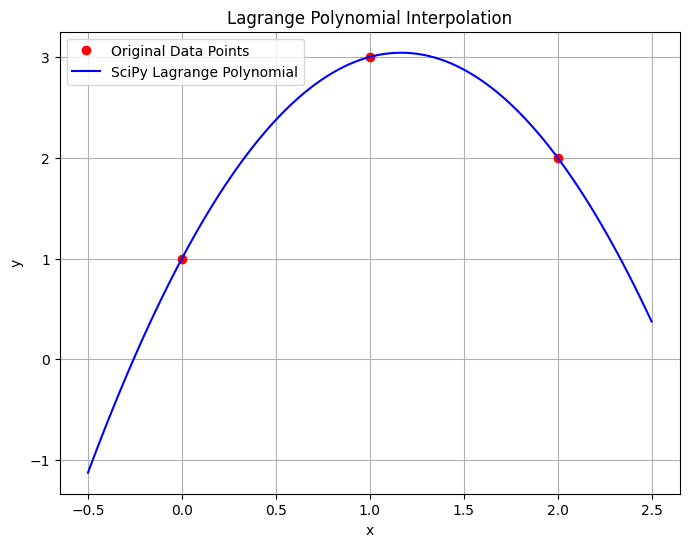

SciPy Lagrange Polynomial Coefficients: [-1.5  3.5  1. ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Given data points
x = np.array([0, 1, 2])  # Independent variable
y = np.array([1, 3, 2])  # Dependent variable

# Compute Lagrange polynomial using scipy
L_scipy = lagrange(x, y)  # SciPy function returns a polynomial

# Generate x values for plotting
x_new = np.linspace(-0.5, 2.5, 100)
y_scipy = L_scipy(x_new)  # Evaluate the polynomial

# Plot Lagrange polynomial using scipy
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro', label='Original Data Points')  # Original points
plt.plot(x_new, y_scipy, 'b-', label='SciPy Lagrange Polynomial')  # SciPy interpolation
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print the polynomial equation
print(f"SciPy Lagrange Polynomial Coefficients: {L_scipy.coefficients}")

#**17.5 Newton’s Polynomial Interpolation**  
Newton’s polynomial interpolation is a method for constructing a polynomial that passes through a given set of data points using **divided differences**. The general form of the Newton interpolating polynomial is: $$ f(x) = a_0 + a_1 (x - x_0) + a_2 (x - x_0)(x - x_1) + ... + a_n (x - x_0)(x - x_1)...(x - x_{n-1}) $$ where the coefficients $a_i$ are determined using **divided differences**, which are recursively computed from the given data points. This method is particularly advantageous because new points can be added without recomputing the entire polynomial, making it more efficient for sequential interpolation tasks.


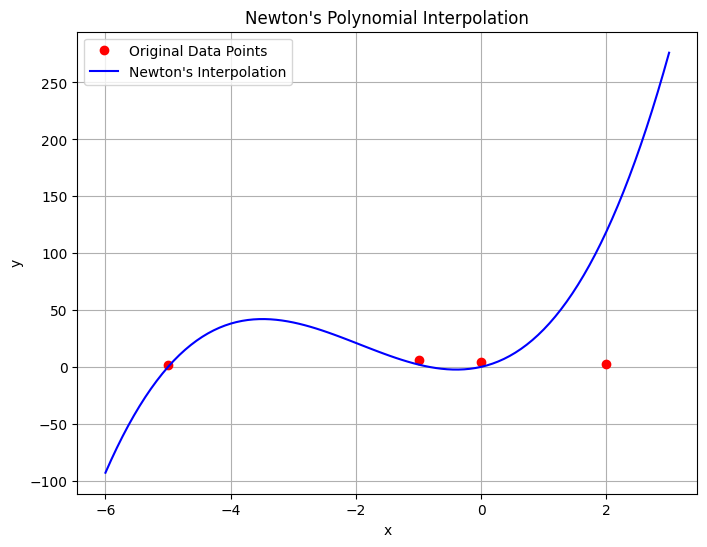

Newton Polynomial Coefficients: [ 0.15714286  0.5        -0.5         3.        ]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute divided differences table
def divided_diff(x, y):
    n = len(x)
    coef = np.array(y, dtype=float)  # Initialize coefficients with y values

    for j in range(1, n):
        for i in range(n - j):
            coef[i] = (coef[i + 1] - coef[i]) / (x[i + j] - x[i])  # Compute divided differences

    return coef  # Return only the first row containing coefficients

# Function to evaluate Newton's polynomial
def newton_poly(coef, x_data, x):
    n = len(x_data)
    p = coef[0]  # Initialize with a_0
    term = 1.0   # Term multiplier

    for k in range(1, n):
        term *= (x - x_data[k - 1])  # Compute the product (x - x_0)(x - x_1)...
        p += coef[k] * term  # Accumulate terms

    return p

# Given data points
x_data = np.array([-5, -1, 0, 2])  # Independent variable
y_data = np.array([2, 6, 4, 3])    # Dependent variable

# Compute divided differences coefficients
coef = divided_diff(x_data, y_data)

# Generate new x values for interpolation
x_new = np.linspace(-6, 3, 100)
y_new = newton_poly(coef, x_data, x_new)  # Evaluate Newton's polynomial

# Plotting the Newton polynomial interpolation
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Original Data Points')  # Data points
plt.plot(x_new, y_new, 'b-', label="Newton's Interpolation")  # Interpolation curve
plt.xlabel('x')
plt.ylabel('y')
plt.title("Newton's Polynomial Interpolation")
plt.legend()
plt.grid()
plt.show()

# Print computed coefficients
print("Newton Polynomial Coefficients:", coef)